#A supervised ML regression example using XGBoost (GPU) & sklearn (pipeline, custom transform & auto hyperparameter tuning) on the King county house sales dataset. (Full pipeline)

#Software installation.

##Upgrade sklearn.

In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


##Install category_encoders.

https://contrib.scikit-learn.org/category_encoders/index.html

##Install XGboost.

In [ ]:
!pip install xgboost

In [ ]:
!pip install category_encoders

##Version information.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import platform   # For checking python version
import sklearn    # For Classifical ML

message = "     Versions     "
print("*" * len(message))
print(message)
print("*" * len(message))
print("Scikit-learn version {}".format(sklearn.__version__))
print("Numpy version {}".format(np.__version__))
print("Pandas version {}".format(pd.__version__))
print("Matplotlib version {}".format(matplotlib.__version__))
print("Python version {}".format(platform.python_version()))

******************
     Versions     
******************
Scikit-learn version 0.24.2
Numpy version 1.19.5
Pandas version 1.1.5
Matplotlib version 3.2.2
Python version 3.7.10


#Load data.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/applied_AI_ML/CA1/kc_house/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# EDA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


##Data types.

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Missing values.

In [ ]:
print("Missing values \n", df.isnull().sum())

Missing values 
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


## Distribution of the target.

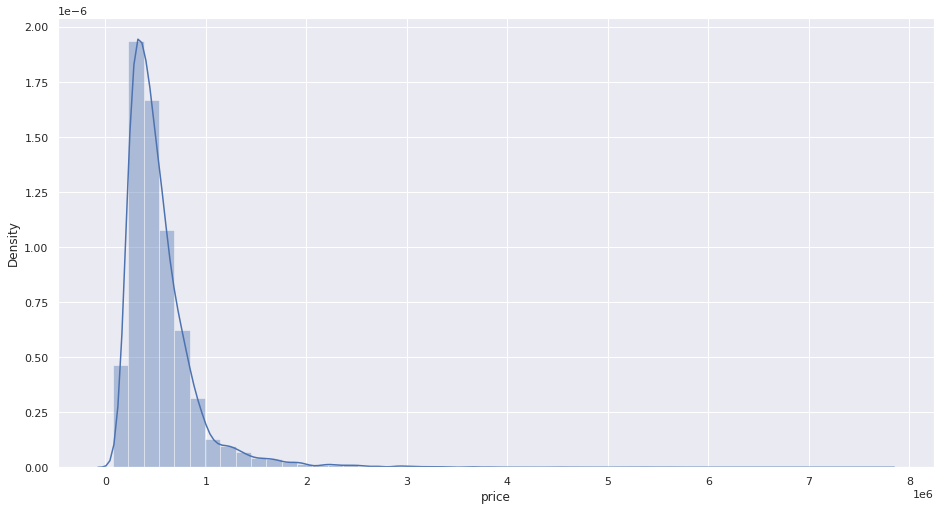

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.distplot(df['price'], bins = 50)
plt.show()

## Correlation between features.


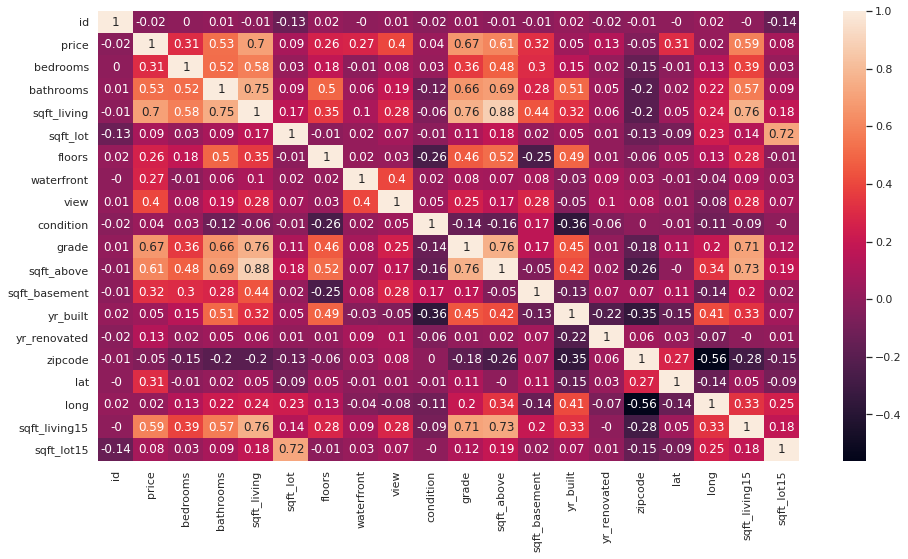

In [ ]:
corr =  df.corr().round(2)
sns.heatmap(data=corr, annot=True)

##Features vs price.

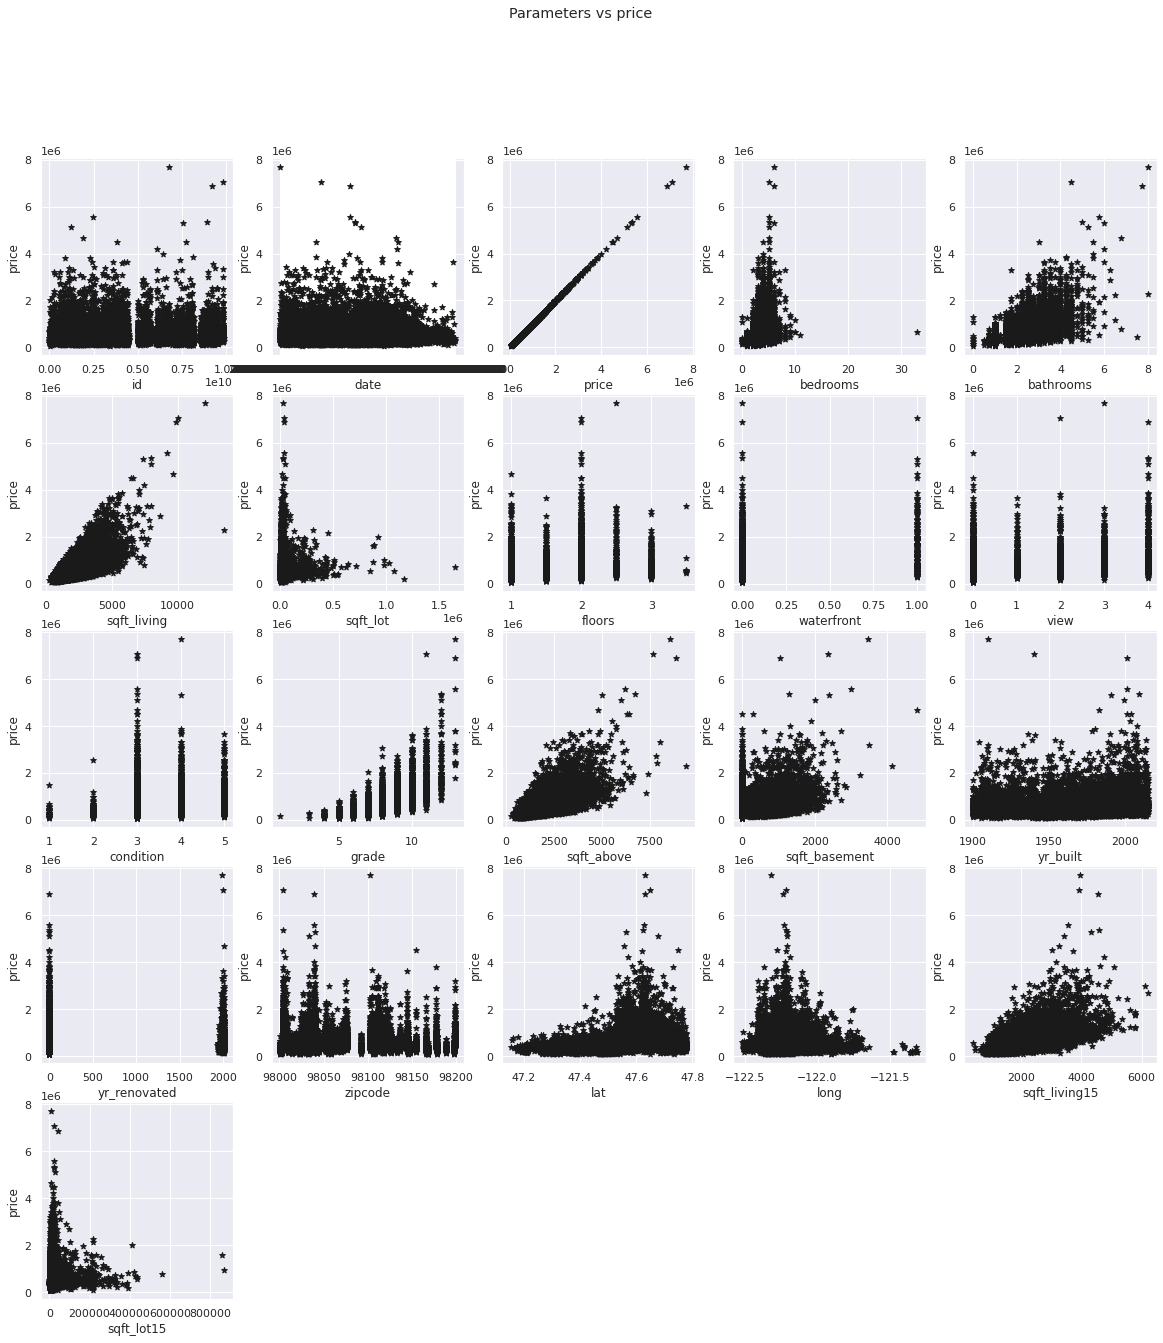

In [ ]:
import math

fig = plt.figure(figsize=(20,21))
fig.suptitle("Parameters vs price")
size = math.ceil(math.sqrt(df.shape[1]))
i = 1
for key in df.keys():
  ax1 = fig.add_subplot(size,size,i)
  i += 1
  ax1.scatter(df[key], df['price'], marker = '*', c = 'k')
  ax1.set_xlabel(key)
  ax1.set_ylabel("price")

##Plot boxplot to observe outliers.

price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


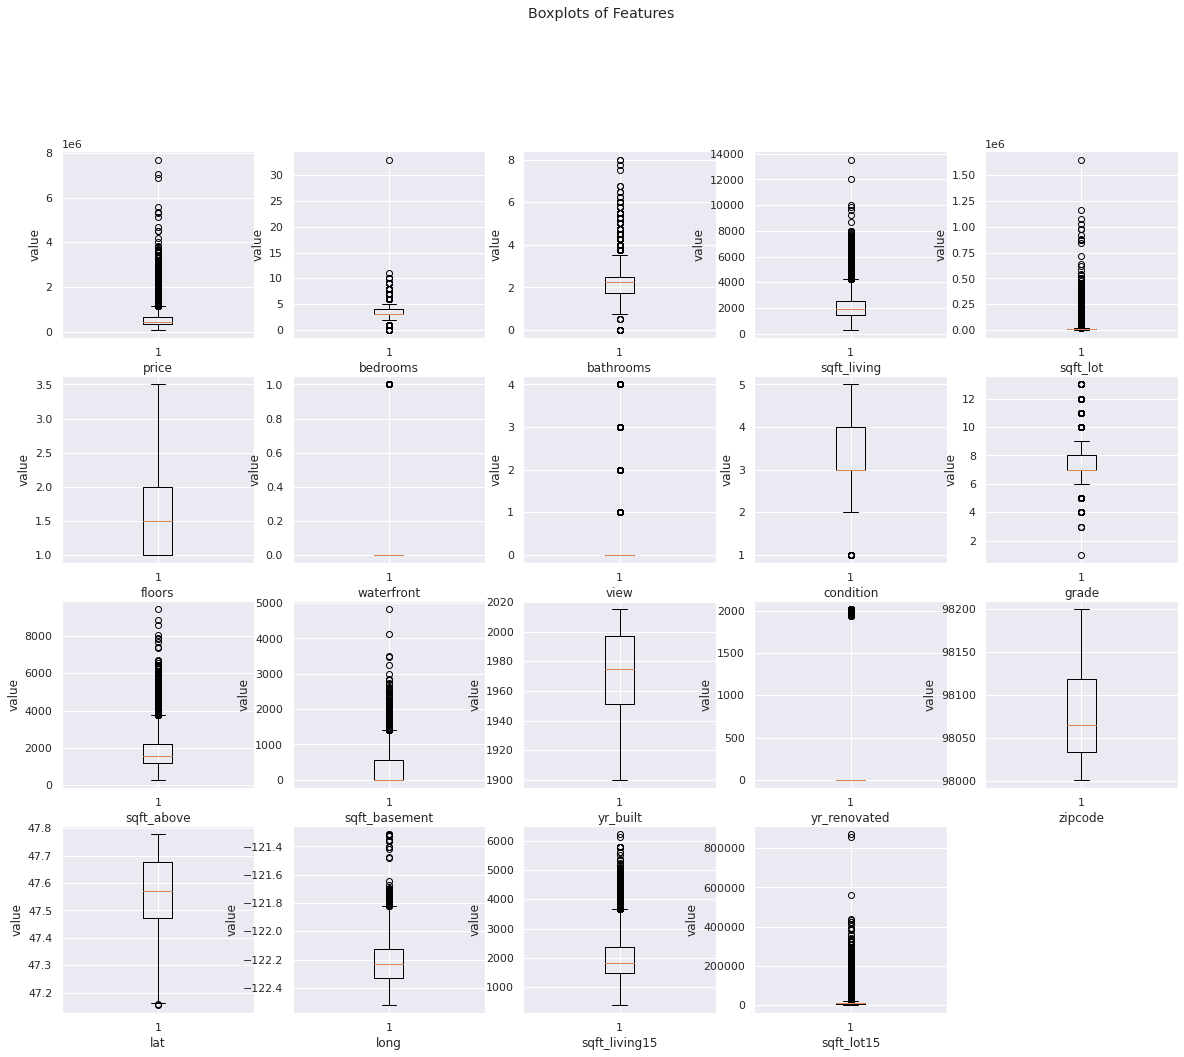

In [ ]:
import math

fig = plt.figure(figsize=(20,20))
fig.suptitle("Boxplots of Features")
size = math.ceil(math.sqrt(df.shape[1]))
i = 1
tmp_df = df.drop(['id','date'], axis=1)
for key in tmp_df.keys():
  ax1 = fig.add_subplot(size,size,i)
  i += 1
  print(key)
  #ax1.boxplot(tmp_df[key], tmp_df['price'])
  ax1.boxplot(tmp_df[key])
  ax1.set_xlabel(key)
  ax1.set_ylabel("value")

#Feature engineering.

##Engineer new features.

In [ ]:
from sklearn.preprocessing import FunctionTransformer

def feat_eng(df):
    # Engineer artificial composite features based on feature correlations.

    df['yr_built_s_yr_renovated'] = df['yr_renovated'] - df['yr_built']
    #df['lat_m_long'] = df['lat'] * df['long']

    return df

feat_eng_transformer = FunctionTransformer(feat_eng)

##Drop the unused/unwanted features.

In [ ]:
"""
id                 int64      0     d
date              object      1     d
bedrooms           int64      2          
bathrooms        float64      3     
sqft_living        int64      4    
sqft_lot           int64      5     
floors           float64      6     c
waterfront         int64      7     c
view               int64      8     c
condition          int64      9     c
grade              int64      10    c
sqft_above         int64      11    
sqft_basement      int64      12
yr_built           int64      13    c
yr_renovated       int64      14    c
zipcode            int64      15    c
lat              float64      16
long             float64      17
sqft_living15      int64      18
sqft_lot15         int64      19
dtype: object
"""
df = df.drop(['id', 
              'date',
              #'sqft_lot',
              #'long',
              #'sqft_lot15', 

              #'floors',
              #'waterfront',
              #'view',
              #'condition',
              #'yr_built',
              #'yr_renovated',
              ], axis=1)                        


##Remove outliers (rows) based on Z-score.

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(df))
print(z.shape)

threshold = 5
loc = np.where(z > threshold)
print(len(loc))
print(len(loc[0]))
print(len(loc[1]))

print(df.shape)
#df = df[(z < threshold).all(axis=1)]
df = df[(np.abs(stats.zscore(df['price'])) < threshold)]
#df = df[(np.abs(stats.zscore(df['price'])) < threshold) & (np.abs(stats.zscore(df['sqft_above'])) < threshold)]
print(df.shape)

#print(df)


(21613, 19)
2
805
805
(21613, 19)
(21487, 19)


##Set feature as numeric or categorical.

In [ ]:
#Separate the Categorical and Numerical Data
#Separate the numeric data
numeric_data = ['bedrooms','bathrooms',
                'sqft_living',
                'sqft_lot',
                'sqft_above',
                'sqft_basement',
                'lat', 
                'long', 
                'sqft_living15', 
                'sqft_lot15'
                ]

#Separate the categorical data
categorical_data = ['floors',
                    'waterfront',
                    'view',
                    'condition',
                    'grade', 
                    'yr_built', 
                    'yr_renovated',
                    'zipcode',
                    'yr_built_s_yr_renovated',
                    ]

print(numeric_data)
print(categorical_data)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
['floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'yr_built_s_yr_renovated']


##Separate features & target.

In [ ]:
X = df.drop(['price'], axis=1)
y = df['price']

print(X.head())
print(y.head())

   bedrooms  bathrooms  sqft_living  ...     long  sqft_living15  sqft_lot15
0         3       1.00         1180  ... -122.257           1340        5650
1         3       2.25         2570  ... -122.319           1690        7639
2         2       1.00          770  ... -122.233           2720        8062
3         4       3.00         1960  ... -122.393           1360        5000
4         3       2.00         1680  ... -122.045           1800        7503

[5 rows x 18 columns]
0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64


## Train/test split.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train_cols = X_train.columns

#Creating Pipeline for the model.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA 

from category_encoders import TargetEncoder, BinaryEncoder, CatBoostEncoder, WOEEncoder, LeaveOneOutEncoder, JamesSteinEncoder

#Numeric Transformation Pipeline
numeric_transformer = Pipeline(steps = [
  ('imputer', SimpleImputer(strategy='median')),  
  #('scaler', MinMaxScaler(feature_range=(-1,1))),  
  ('scaler', StandardScaler()),       
  ('transform', PowerTransformer()),        
  ('pca', PCA()),                              
])

#Categorical Transformation Pipeline
categorical_transformer = Pipeline(steps = [
  #('imputer', SimpleImputer(strategy='constant', fill_value='0')),
  ('imputer', SimpleImputer(strategy='median')),  
  #('onehot', OneHotEncoder(handle_unknown='ignore')),
  #('bin_encoder', BinaryEncoder(verbose=0)),
  ('cat_encoder', CatBoostEncoder(verbose=0)),
])

### Compose the 2 transformers.


In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
                  ('num', numeric_transformer, numeric_data),
                  ('cat', categorical_transformer, categorical_data),
])

###Create pipeline (using XGboost with **GPU** option).

In [ ]:
# Combine the preprocessor with the Estimator

import xgboost as xgb

pipe = Pipeline(steps=[
    ('feat_eng', feat_eng_transformer),
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(objective='reg:squarederror', 
                               tree_method='gpu_hist')),     # Use GPU (Need to change Colab runtime type to use GPU).
])                    

pipe.fit(X_train, y_train)
print("%s score: %.3f" % (pipe.__class__.__name__, pipe.score(X_test, y_test)))  

Pipeline score: 0.828


#Training.


###Algorithm comparison.
#### Quick visual inspection on the performance of various estimator.

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

models = []
models.append(('SGD', SGDRegressor()))
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
#models.append(('XGB', xgb.XGBRegressor(objective ='reg:linear')))      # CPU version
models.append(('XGB', xgb.XGBRegressor(objective ='reg:squarederror', 
                                       tree_method='gpu_hist')))      # Use GPU (Need to change Colab runtime type to use GPU).
#models.append(('XGB tuned', xgb.XGBRegressor(objective ='reg:squarederror', 
#                                             tree_method='gpu_hist',
#                                             max_depth= 3,
#                                             n_estimators= 500,
#                                             learning_rate= 0.1,)))      # Use GPU (Need to change Colab runtime type to use GPU). 

# Python example
#param['updater'] = 'grow_gpu'

In [ ]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#Create a list of models to do a quick test
#for name, model in models:
  #model.fit(X_train, y_train)
  #y_pred = model.predict(X_test)
  #To evaluate the quality of the model
  #print(name, mean_squared_error(y_test, y_pred))

for name, m in models:
    pipe_grp = Pipeline(steps=[
                  ('feat_eng', feat_eng_transformer),
                  ('preprocessor', preprocessor),
                  ('model', m)
                  ])
    pipe_grp.fit(X_train, y_train)
    print("%s score: %.3f" % (m.__class__.__name__, pipe_grp.score(X_test, y_test)))        

SGDRegressor score: -68184615445629008609280.000
LinearRegression score: 0.677
Lasso score: 0.677
ElasticNet score: 0.644
KNeighborsRegressor score: 0.684
DecisionTreeRegressor score: 0.689
SVR score: -0.053
RandomForestRegressor score: 0.841
GradientBoostingRegressor score: 0.827
XGBRegressor score: 0.828


###Hyperparameter tuning using XGboost with **GPU** runtime.

In [ ]:
from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# specify parameters and distributions to sample from
param_dist = {#'objective': ['reg:squarederror'], 
              #'tree_method': ['gpu_hist'],     # Use GPU
              #'regressor__model__max_depth': [3, 5, 7, 9],
              #'regressor__model__n_estimators': [100, 300, 500, 700],
              #'regressor__model__learning_rate': [0.1, 0.05, 0.01, 0.005],                         
              'model__max_depth': [3, 5, 7],
              'model__n_estimators': [100, 300, 500],
              'model__learning_rate': [0.1, 0.05, 0.01],                         
              }

#sorted(sklearn.metrics.SCORERS.keys())
#pipe.get_params().keys()                              

# run randomized search
n_iter_search=10
random_search = RandomizedSearchCV(estimator=pipe, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring ='r2',
                                   cv=5)

start = time()

#best_model = grid_search.fit(X_train, y_train)
best_model = random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

#print(grid_search.cv_results_)              
#print(random_search.cv_results_)              

RandomizedSearchCV took 129.18 seconds for 10 candidates parameter settings.


In [ ]:
#Get the estimator model
best_predictor = best_model.best_estimator_

#Print out the hyperparameters
#params = best_predictor.regressor_['model'].get_params()
params = best_predictor['model'].get_params()

print("Best max_depth:", params['max_depth'])
print("Best n_estimators:", params['n_estimators'])
print("Best learning_rate:", params['learning_rate'])

Best max_depth: 5
Best n_estimators: 300
Best learning_rate: 0.1


### Validation and Evaluation.

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

print(mean_squared_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_pred, y_test))
print(median_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

11668754278.093758
0.12998918546197347
41613.609375
0.8736510835023614


In [ ]:
SS_Residual = sum((y_test.values-y_pred)**2)          
SS_Total = sum((y_test.values-np.mean(y_test.values))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print (r_squared)
print( adjusted_r_squared)

0.8736510835023661
0.8730899265567245


###Feature importance.

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_train, y_train, n_repeats=3, random_state=22)

In [ ]:
importances_mean_df = pd.DataFrame(data=result.importances_mean.reshape(1,len(X_train.columns)), columns= X_train.columns)
print("Feature importance mean:")
print((importances_mean_df.T)[0].sort_values())
print()
print("Feature importance std:")
importances_std_df = pd.DataFrame(data=result.importances_std.reshape(1,len(X_train.columns)), columns= X_train.columns)
print((importances_std_df.T)[0].sort_values())

Feature importance mean:
yr_built_s_yr_renovated    0.000000
floors                     0.002611
yr_renovated               0.008099
condition                  0.011690
waterfront                 0.013462
view                       0.029898
bedrooms                   0.038625
sqft_basement              0.039918
sqft_lot15                 0.044832
bathrooms                  0.046233
sqft_lot                   0.052305
long                       0.063471
sqft_living15              0.075853
sqft_above                 0.086976
yr_built                   0.095213
zipcode                    0.096514
sqft_living                0.116967
grade                      0.235487
lat                        0.317651
Name: 0, dtype: float64

Feature importance std:
yr_built_s_yr_renovated    0.000000
floors                     0.000051
waterfront                 0.000113
yr_renovated               0.000151
sqft_lot                   0.000156
condition                  0.000342
sqft_basement             